In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# SOAL 1

## Price

In [9]:
#central tendency
print('Price mean :', df.price.mean())
print('Price median :', df.price.median())
print('Price mode :', df.price.mode()[0])

Price mean : 540296.5735055795
Generosity median : 450000.0
Generosity mode : 350000.0


In [10]:
#dispersion
print('Price Range:', df.price.max()-df.price.min())
print('')
print('Price Std:', df.price.std())
print('')
print('Price Quartile:\n'+str(df.price.quantile([0.25,0.5,0.75,1])))
print('')
print('Price IQR:', df.price.quantile(0.75)-df.price.quantile(0.25))


Price Range: 7622000.0

Price Std: 367368.1401013945

Price Quartile:
0.25     322000.0
0.50     450000.0
0.75     645000.0
1.00    7700000.0
Name: price, dtype: float64

Price IQR: 323000.0


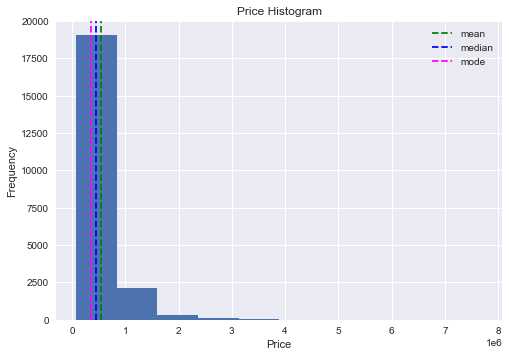

In [48]:
#distribution
plt.style.use('seaborn')
plt.hist(df.price, bins=10)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')


plt.axvline(df.price.mean(), color = 'green', linestyle='--',label='mean')
plt.axvline(df.price.median(), color = 'blue', linestyle='--',label='median')
plt.axvline(df.price.mode()[0], color = 'magenta', linestyle='--',label='mode')
plt.legend()
plt.show()

variable price memiliki distribusi right-skewed

## Grade

In [22]:
#central tendency
print('Grade mean :', df.grade.mean())
print('Grade median :', df.grade.median())
print('Grade mode :', df.grade.mode()[0])

Grade mean : 7.657915451220076
Grade median : 7.0
Grade mode : 7


In [24]:
#dispersion
print('Grade Range:', df.grade.max()-df.grade.min())
print('')
print('Grade Std:', df.grade.std())
print('')
print('Grade Quartile:\n'+str(df.grade.quantile([0.25,0.5,0.75,1])))
print('')
print('Grade IQR:', df.grade.quantile(0.75)-df.grade.quantile(0.25))


Grade Range: 10

Grade Std: 1.1731996637760254

Grade Quartile:
0.25     7.0
0.50     7.0
0.75     8.0
1.00    13.0
Name: grade, dtype: float64

Grade IQR: 1.0


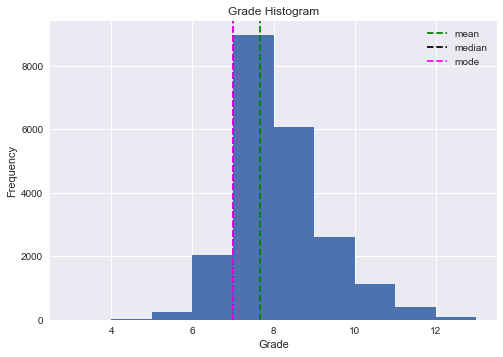

In [47]:
#distribution
plt.style.use('seaborn')
plt.hist(df.grade, bins=10)
plt.title('Grade Histogram')
plt.xlabel('Grade')
plt.ylabel('Frequency')


plt.axvline(df.grade.mean(), color = 'green', linestyle='--',label='mean')
plt.axvline(df.grade.median(), color = 'black', linestyle='--',label='median')
plt.axvline(df.grade.mode()[0], color = 'magenta', linestyle='--',label='mode')
plt.legend()
plt.show()

Karena mean terletak di sebelah kanan median, variable grade memiliki distribusi right skewed

# SOAL 2

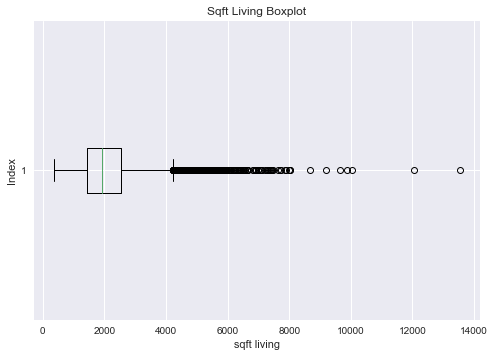

In [38]:
#finding outlier on sqft_living
plt.boxplot(df.sqft_living, vert=False)
plt.title('Sqft Living Boxplot')
plt.xlabel('sqft living')
plt.ylabel('Index')
plt.show()

In [37]:
q3 = df.sqft_living.quantile(0.75)
q1 = df.sqft_living.quantile(0.25)
iqr = q3 - q1
outlier_low = q1 - 1.5*iqr
outlier_upp = q3 + 1.5*iqr
df[['id', 'sqft_living']][(df.sqft_living < outlier_low) | (df.sqft_living > outlier_upp)]

id  sqft_living
5      7237550310         5420
70     1525059190         4770
115    3626039325         4380
153    7855801670         5180
239    5152100060         4410
...           ...          ...
21535  1561750040         4350
21545  6664500090         4500
21560  9253900271         4850
21574  7430200100         4910
21584   249000205         4470

[571 rows x 2 columns]

terdapat 571 data outlier, dimana luas (sqft) dari hunian lebih besar dari 4230 sqft.

# SOAL 3

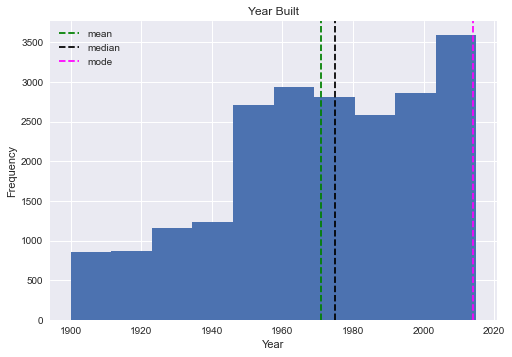

In [46]:
#Distribution of yr_built
plt.hist('yr_built', data=df, bins=10)
plt.title('Year Built')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.axvline(df.yr_built.mean(), color = 'green', linestyle='--', label='mean')
plt.axvline(df.yr_built.median(), color = 'black', linestyle='--',label='median')
plt.axvline(df.yr_built.mode()[0], color = 'magenta', linestyle='--',label='mode')
plt.legend()
plt.show()

Terlihat di histogram bahwa distribusi variable yr_built merupakan left_skewed, yang berarti data rumah yang dijual lebih banyak yang dibangun pada masa modern.

# SOAL 4

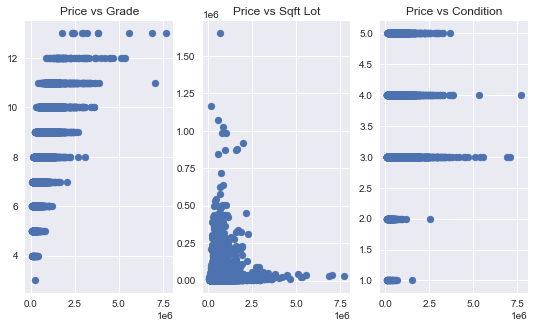

In [61]:
fig,ax = plt.subplots(1,3, figsize=(9,5))
ax[0].scatter(df.price,df.grade)
ax[0].set_title('Price vs Grade')
ax[1].scatter(df.price, df.sqft_lot)
ax[1].set_title('Price vs Sqft Lot')
ax[2].scatter(df.price, df.condition)
ax[2].set_title('Price vs Condition')
plt.show()

Karena Grade, dan Condition merupakan data diskrit, maka menggunakan spearman, sedangkan Sqft lot menggunakan pearson

In [59]:
df[['price', 'grade', 'condition']].corr(method='spearman')

price     grade  condition
price      1.000000  0.658152   0.017995
grade      0.658152  1.000000  -0.168104
condition  0.017995 -0.168104   1.000000

In [60]:
df[['price', 'sqft_lot']].corr(method='pearson')

price  sqft_lot
price     1.000000  0.089876
sqft_lot  0.089876  1.000000

Berdasarkan perhitungan korelasi, price memiliki korelasi yang paling tinggi dengan grade (positif). Sedangkan condition dan sqft_lot hanya memiliki korelasi yang rendah dengan price

## SOAL 5

In [68]:
avg_price = df.price.mean()
df_high_price = df[df.price > avg_price]

### 5 rumah yang harganya paling tinggi

In [69]:
df_high_price.sort_values(by='price', ascending=False).head()

id        date      price  bedrooms  bathrooms  sqft_living  \
7245  6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910  9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245  9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407  2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446  8907500070   4/13/2015  5350000.0         5       5.00         8000   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245     27600     2.5           0     3  ...     13        8570   
3910     37325     2.0           1     2  ...     11        7680   
9245     31374     2.0           0     4  ...     13        8860   
4407     35069     2.0           0     0  ...     13        6200   
1446     23985     2.0           0     4  ...     12        6720   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245           3480      1910          1987    98102  47.6298 -122.323   
3910           2360      1940          2001    98004  47.6500 -122.214   
9245           1030      2001             0    98039  47.6305 -122.240   
4407           3000      2001             0    98039  47.6289 -122.233   
1446           1280      2009             0    98004  47.6232 -122.220   

      sqft_living15  sqft_lot15  
7245           3940        8800  
3910           3930       25449  
9245           4540       42730  
4407           3560       24345  
1446           4600       21750  

[5 rows x 21 columns]

### 5 rumah paling banyak berdasarkan zip code

Text(0.5, 1.0, 'Top 5 Number of House by Zip Code')

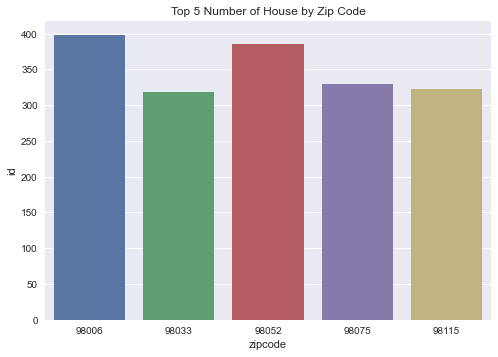

In [93]:
df_zip = df_high_price.groupby('zipcode').agg('count').sort_values(by='id',ascending=False).head(5)
sns.barplot(x=df_zip.index, y=df_zip.id)
plt.title('Top 5 Number of House by Zip Code')


### 5 zip code dengan rata2 grade terendah

Text(0.5, 1.0, 'Lowest 5 Grade by Zip Code')

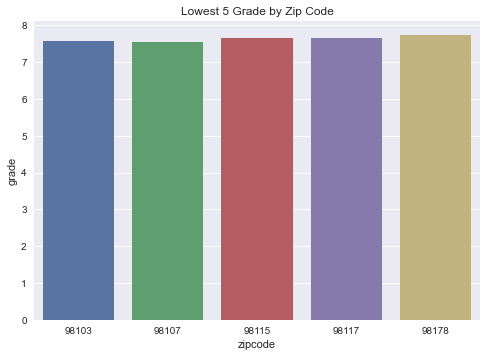

In [97]:
df_zip_grade = df_high_price.groupby('zipcode').grade.agg('mean').sort_values().head(5)
sns.barplot(x=df_zip_grade.index, y=df_zip_grade)
plt.title('Lowest 5 Grade by Zip Code')


### Rata2 harga rumah berdasarkan tahun dibangun

Text(0.5, 1.0, 'Avg House Price by Year Built')

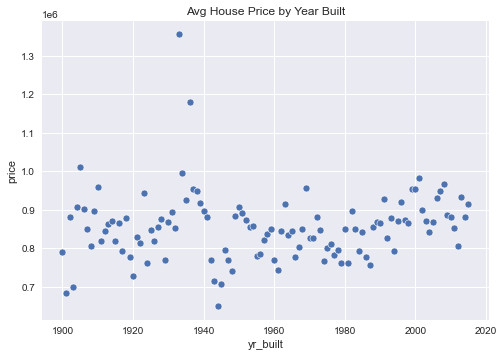

In [104]:
df_price_yr = df_high_price.groupby('yr_built').price.agg('mean')
sns.scatterplot(x=df_price_yr.index, y=df_price_yr)
plt.title('Avg House Price by Year Built')

Rata-rata harga rumah tidak memperlihatkan perbedaan yang signifikan untuk setiap tahun pembangunan rumah tersebut. Kecuali untuk dua data outlier